# Notebook Instructions

1. If you are new to Jupyter notebooks, please go through this introductory manual <a href='https://quantra.quantinsti.com/quantra-notebook' target="_blank">here</a>.
1. Any changes made in this notebook would be lost after you close the browser window. **You can download the notebook to save your work on your PC.**
1. Before running this notebook on your local PC:<br>
i.  You need to set up a Python environment and the relevant packages on your local PC. To do so, go through the section on "**Run Codes Locally on Your Machine**" in the course.<br>
ii. You need to **download the zip file available in the last unit** of this course. The zip file contains the data files and/or python modules that might be required to run this notebook.

# Create Synthetic Time Series

In this Notebook you will learn how to create synthetic OHLC for mean-reverting (sine) wave, trending wave and a mixed wave pattern.
To do this, you need to follow these steps:

1. [Import modules](#Import_modules)
1. [Read price data](#Read_price_data)
1. [Create synthetic OHLCV](#Create_synthetic_ohlc)
    1. [Mean reverting time series](#Mean_reverting_time_series)
    1. [Trending time series](#Trending_time_series)
    1. [Mixed time series](#Mix_Time_Series)

<a id='Import_modules'></a> 
## Import modules

In [1]:
# Import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')

import os
import sys
sys.path.append("..")

# To suppress GPU related warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# Import Quantra RL libraries
from data_modules.quantra_reinforcement_learning import run
from data_modules.quantra_reinforcement_learning import reward_exponential_pnl

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

<a id='Read_price_data'></a>
## Read price data

In [2]:
# Price date is stored in data_modules
path = os.path.join('..','data_modules','PriceData5m.bz2')

# Read the price data
bars5m = pd.read_pickle(path)

# Display the last 5 entries of price data
bars5m.tail()

,open,high,low,close,volume
Time,,,,,
2020-08-31 15:40:00-04:00,350.44,350.750,350.433,350.692,658254.0
2020-08-31 15:45:00-04:00,350.71,350.733,350.330,350.680,842439.0
2020-08-31 15:50:00-04:00,350.69,351.270,350.640,351.210,1640390.0
2020-08-31 15:55:00-04:00,351.20,351.300,350.565,350.580,1890384.0
2020-08-31 16:00:00-04:00,350.59,350.730,349.770,349.770,3910688.0


<a id='Create_synthetic_ohlc'></a>
## Create synthetic OHLCV

Synthetic OHLCV is the simulated price of an underlying, based on the underlying's price data, but offset by a random noisy signal. You need to define a function `create_synth_ohlc()` for doing this.

The term OHLCV stands for Open, High, Low, Close and Volume of the underlying asset.

The logical flow for creating synthetic OHLCV is as :
1. The base signal, `y` is taken. In this notebook, you will work with the base signal as sine, trending and mixed types
1. Some standard normal noise multiplied by some factor `mult` is added to the signal
1. The `open` and `close` prices are made using the above signal + noise from the step above
1. The `high` and `low` prices are made so that they are almost 1 unit away from the `open` and `close`
1. The `volume` is arbitrarily set to 1000
1. All these values are then fed into a DataFrame and returned for further use

In [3]:
def create_synth_ohlc(y,df,mult=1): 
    """
    This creates a data frame with synthetic open/high/low/close prices
    based on the dates of the original price data for test and
    comparison.

    A wave y is taken which has some particular nature(sine wave/trending/etc).
    A DataFrame df is taken which gives us the length of the synthetic data to 
    be constructed.
    A multiplier mult is taken, with a default value of 1.
    """
    
    # Generate synthetic data using the randn()

    # wave + multiplier * random number is done for the length of df
    op = pd.Series(y+mult*np.random.randn(len(df)),index=df.index)
    cl = pd.Series(y+mult*np.random.randn(len(df)),index=df.index)

    # Assuming high and low to be 1 unit further away
    # High : wave + 1 + multiplier * random number is done for the length of df
    hi = pd.Series(y+1+mult*np.abs(np.random.randn(len(df))),index=df.index)

    # Low : wave - 1 - multiplier * random number is done for the length of df
    lo = pd.Series(y-1-mult*np.abs(np.random.randn(len(df))),index=df.index)
    vol = pd.Series(1000,index=df.index)
    
    # Make a DataFrame from the synthetic data
    # .T is to transpose the DataFrame
    dfs = pd.DataFrame([op,hi,lo,cl,vol]).T
    
    # Price date is stored in data_modules
    dfs.index.rename('Time',inplace=True)
    
    # Rename columns
    dfs.columns = ['open','high','low','close','volume']
    return dfs

<a id='Mean_reverting_time_series'></a>
## Mean reverting time series

To create a mean-reverting time series, you need to perform the following steps:
1. A sine wave pattern `y` is created using the `sin()` in the `numpy` package
1. The sine wave `y` is passed to the `create_synth_ohlc` function where some noise is added and a synthetic time series data frame is returned

**Note:** For this notebook, we use the first 5000 data points since this is just an illustrative example.

In [4]:
def create_synth_sine_time_series(df, mult):
    """
    This creates an artificial prices series for trends and/or sine waves
    and optionally, noise can be added to this.
    """
    
    # Create an array of increasing independent numbers(x)
    x = np.arange(len(df))

    # Create an array of dependent values(y) by computing the equation
    y = 10*np.sin(0.005*x)+100

    # Pass the sine wave pattern to create a synthetic time series based on it
    sine_ts = create_synth_ohlc(y, df, mult)

    return sine_ts


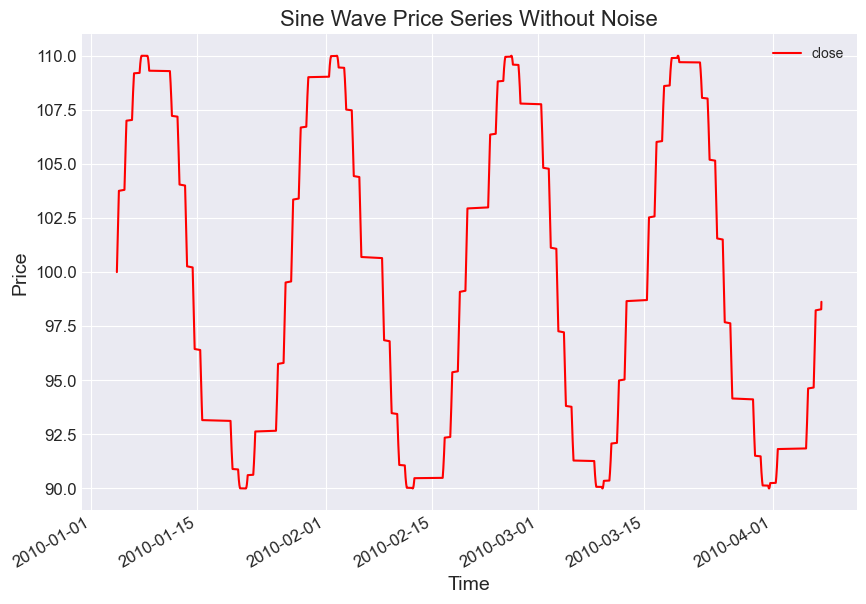

In [5]:
# Create a sine wave pattern(without noise) for the time series for the first 5000 data points
sine_ts = create_synth_sine_time_series(bars5m.iloc[:5000], mult = 0)

# Define the figure size for the sine wave plot
sine_ts[:]['close'].plot(figsize=(10, 7), color='r')

# Add legend to the axis
plt.legend()

# Add labels
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title('Sine Wave Price Series Without Noise', fontsize=16)
    
# Define the tick size for x-axis and y-axis
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.show()

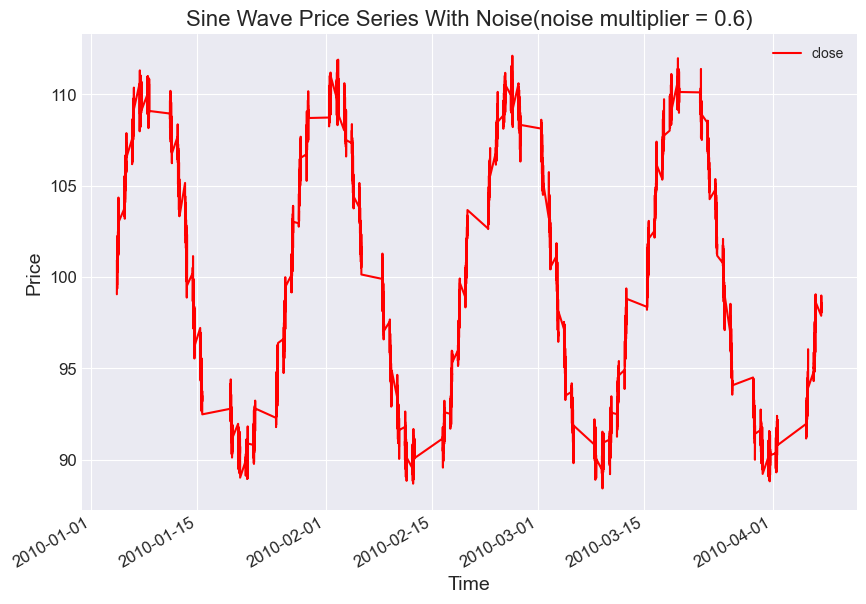

In [6]:
# Create a sine wave pattern(with noise) for the time series for the first 5000 data points
sine_ts = create_synth_sine_time_series(bars5m.iloc[:5000], mult = 0.6)

# Define the figure size for the sine wave plot
sine_ts[:]['close'].plot(figsize=(10, 7), color='r')

# Add legend to the axis
plt.legend()

# Add labels
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title('Sine Wave Price Series With Noise(noise multiplier = 0.6)', fontsize=16)
    
# Define the tick size for x-axis and y-axis
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.show()

<a id='Trending_time_series'></a>
## Trending time series

To create a trending time series, you need to perform the following steps:
1. A trending pattern `y` is created using the requisite equation
1. The trending pattern is passed to the `create_synth_ohlc` function where some noise is added and a synthetic time series data frame is returned

**Note:** For this notebook, we use the first 5000 data points since this is just an illustrative example.

In [7]:
def create_synth_trending_time_series(df, mult):
    """
    This creates an artificial prices series for trends and/or sine waves
    and optionally, noise can be added to this.
    """
   
    x = np.arange(len(df))

    # the equation of the wave is changed from a sine wave to a trending one
    y = 0.01*x+100

    trending_ts = create_synth_ohlc(y,df,mult)
    
    return trending_ts 

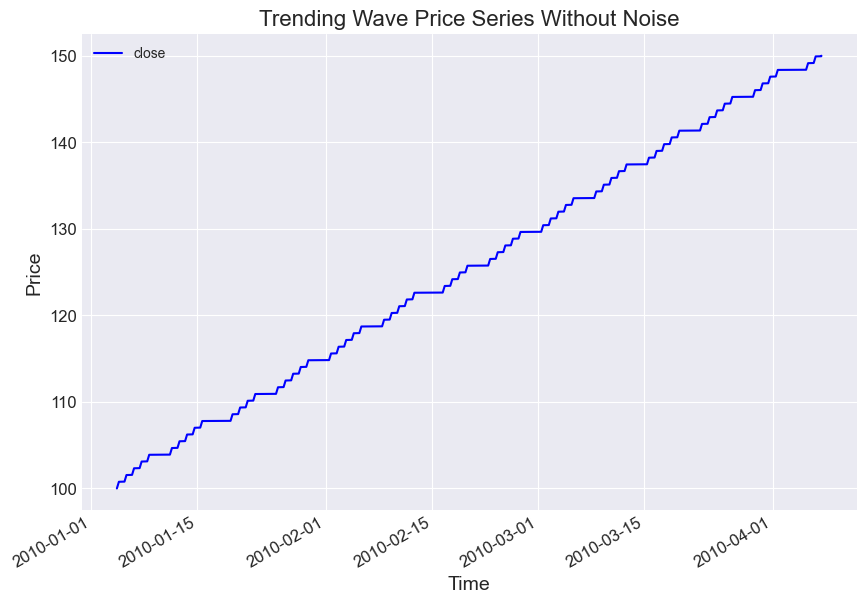

In [8]:
# Create a trending wave pattern(without noise) for the time series for the first 5000 data points
trending_ts = create_synth_trending_time_series(bars5m.iloc[:5000], mult = 0)

# Define the figure size for the trending wave plot
trending_ts[:]['close'].plot(figsize=(10, 7), color='b')

# Add legend to the axis
plt.legend()

# Add labels
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title('Trending Wave Price Series Without Noise', fontsize=16)
    
# Define the tick size for x-axis and y-axis
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.show()

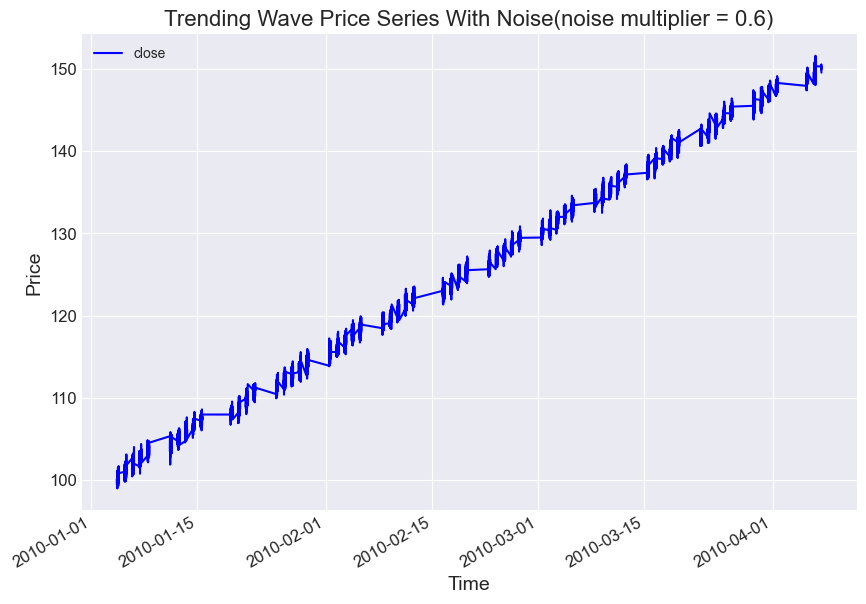

In [9]:
# Create a trending wave pattern(with noise) for the time series for the first 5000 data points
trending_ts = create_synth_trending_time_series(bars5m.iloc[:5000], mult = 0.6)

# Define the figure size for the trending wave plot
trending_ts[:]['close'].plot(figsize=(10, 7), color='b')

# Add legend to the axis
plt.legend()

# Add labels
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title('Trending Wave Price Series With Noise(noise multiplier = 0.6)', fontsize=16)
    
# Define the tick size for x-axis and y-axis
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.show()

<a id='Mix_Time_Series'></a>
## Mixed time series

To create a mixed wave pattern, you need to perform the following steps:
1. A mixed wave pattern `y` is created using the `sin()` from the `numpy` package and the trending equation you want to use
1. The mixed wave pattern is passed to the `create_synth_ohlc` function where some noise is added and a synthetic time series data frame is returned

**Note:** For this notebook, we use the first 10000 data points since this is just an illustrative example.

In [10]:
def create_synth_mixed_trend_time_series(df, mult):
    """
    This creates an artificial prices series for trends and/or sine waves
    and then a trend, optionally, noise can be added to this.
    """
    
    # Calculate length of the synthetic time series
    ldf = len(df)
    mid = int(ldf/2)
    x = np.arange(ldf)
    y = np.zeros(ldf)
    
    # First half is a sine wave
    y[:mid] = 10*np.sin(0.01*x[:mid])+100
    
    # Second half is a trending series
    y[mid:] = 0.01*(x[mid:]-x[mid])+100
    
    # Create the synthetic OHLC
    mixed_sine_ts = create_synth_ohlc(y, df, mult)
    return mixed_sine_ts

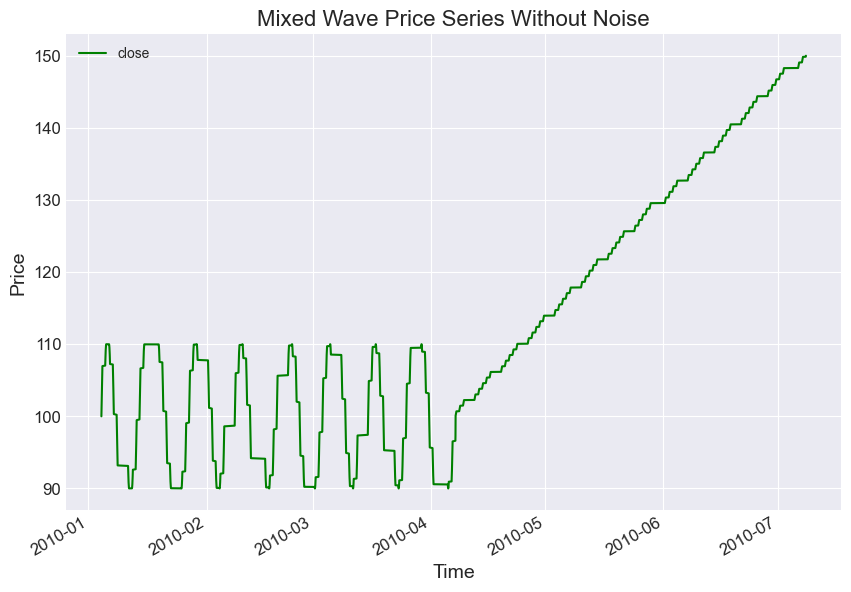

In [11]:
# Create a mixed wave pattern(without noise) for the time series for the first 10000 data points
mixed_sine_ts = create_synth_mixed_trend_time_series(bars5m.iloc[:10000], mult = 0)

# Define the figure size for the mixed wave plot
mixed_sine_ts['close'].plot(figsize=(10, 7), color='g')

# Add legend to the axis
plt.legend()

# Add labels
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title('Mixed Wave Price Series Without Noise', fontsize=16)
    
# Define the tick size for x-axis and y-axis
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.show()

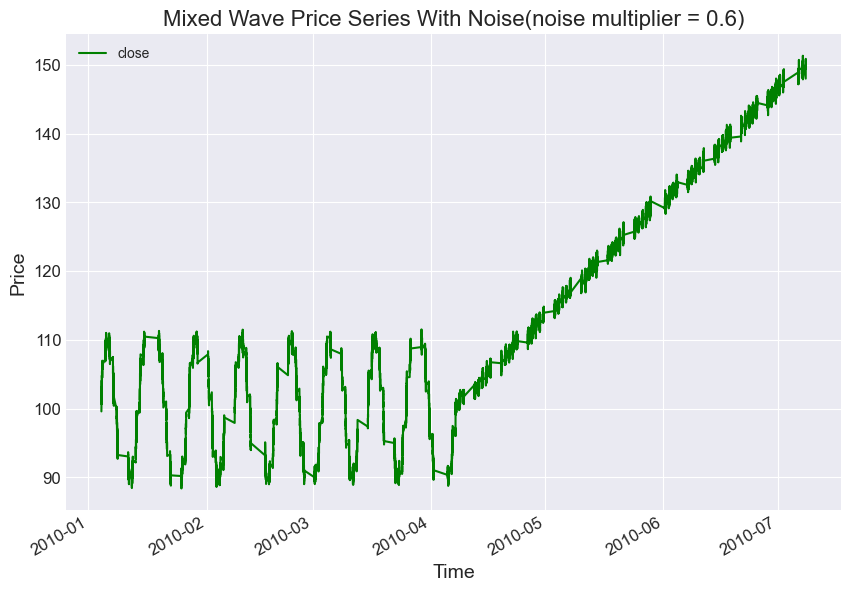

In [12]:
# Create a mixed wave pattern(without noise) for the time series for the first 10000 data points
mixed_sine_ts = create_synth_mixed_trend_time_series(bars5m.iloc[:10000], mult = 0.6)

# Define the figure size for the mixed wave plot
mixed_sine_ts['close'].plot(figsize=(10, 7), color='g')

# Add legend to the axis
plt.legend()

# Add labels
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title('Mixed Wave Price Series With Noise(noise multiplier = 0.6)', fontsize=16)
    
# Define the tick size for x-axis and y-axis
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.show()

## Tweak the code
You can tweak the code in the following ways:

1. Use different equations for the mean-reverting and the trending equation
1. Use differnt values of the noise multiplication factor `mult`
1. Use different input wave pattern, like sine + trending down + sine, and so on

In the next unit, you will learn how to run the reinforcement learning model on 
the mixed wave pattern and see the strategy performance.
<br><br>